In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar

pd.set_option('display.max_columns', None) 

In [2]:
perims = gpd.read_parquet('data/OR18_21Perims_withID.parquet')
perims.sample()

,geometry,duration,fireID,t,perimID
487,"MULTIPOLYGON (((-2132588.716 2519038.468, -213...",30.0,F9034,2018-08-16,F9034_58


In [3]:
drops = gpd.read_parquet('data/realFakeDrops.parquet')
realDrops = drops.loc[drops.real_drop]
fakeDrops = drops.loc[~drops.real_drop]
drops.sample()

,dropID,vendor,tail_number,inc_name,inc_num,viirs_fireid,mtbs_eventID,false_pos,split_drop,IA_drop,AC_type,fluid,nonfire,knots,heading_true,alt_feet,gallons,geometry,latitude,longitude,line_length_mile,shape_length,drop_minute,drop_second,UTC_date_time,local_date,local_year,local_month,local_day,local_tz,local_hour,burn_severity,gm_pdsi,gm_srad,gm_vpd,aw_mat,aw_mcmt,aw_mwmt,aw_td,dem,dem_slope,dem_aspect,dem_flow_acc,landfire_fvt,landfire_fbfm40,biomass_afg,biomass_pfg,ndvi,dm_tmax,dm_tmin,hillshade,prev_area,gallon_sum,prev_perimID,fut_perimID,ros_before,ros_after,ros_change,efficacy_mean,real_drop
105,T-161_2018_208_20:16:33,latitude,T-161,LONG HOLLOW 0806 RN,2018-ORPRD-000806,F9653,OR4542812106020180726,NO,NO,YES,LAT,,,128.0,350.0,2752.0,2974.0,"MULTILINESTRING ((-1937962.07 2742901.211, -19...",45.36364,-121.033427,0.146812,236.271841,16,33,2018-07-27 20:16:33,43308.0,2018.0,7.0,27.0,America/Los_Angeles,13.0,1.153846,-2.610001,332.399963,2.85,10.1,0.3,21.299999,21.100002,770.384644,9.816417,257.903992,1.230769,2099.846191,118.769234,649.15387,463.384613,0.2636,21.564516,7.645162,181.461538,4.566130e+07,16458.0,F9653_1,F9653_2,36.666667,67.5,30.833333,persistant,True


In [4]:
rosPts = gpd.read_parquet('data/rosPts_30.parquet')
rosPts.sample()

,geometry,fireID,perimID,t,currPerimSum,currROS,prevPerimSum,prevROS,futPerimSum,futROS
2345353,POINT (-1981350 2443920),F12987,F12987_12,2020-09-14,17.0,0.0,17.0,0.0,16.0,20.561224


In [5]:
fireID = perims.fireID.sample().iloc[0]
fireID = 'F11467'

firePerims = perims[perims.fireID == fireID]
fireDrops = drops[drops.viirs_fireid == fireID]
firePts = rosPts[rosPts.fireID == fireID]
fireID

'F11467'

In [6]:
firePts.sample()

,geometry,fireID,perimID,t,currPerimSum,currROS,prevPerimSum,prevROS,futPerimSum,futROS
1904670,POINT (-2003370 2655810),F11467,F11467_8,2020-08-21 12:00:00,17.0,27.5,16.0,49.471154,18.0,8.564815


In [7]:
firePerims

,geometry,duration,fireID,t,perimID
1534,"POLYGON ((-2007752.866 2658875.806, -2007553.4...",0.0,F11467,2020-08-17 00:00:00,F11467_0
1538,"POLYGON ((-2007240.591 2658452.156, -2007239.9...",0.5,F11467,2020-08-17 12:00:00,F11467_1
1539,"POLYGON ((-2007718.098 2659027.09, -2007702.14...",1.0,F11467,2020-08-18 00:00:00,F11467_2
1547,"POLYGON ((-2009753.652 2658064.376, -2009770.9...",1.5,F11467,2020-08-18 12:00:00,F11467_3
1552,"POLYGON ((-2009770.966 2658072.238, -2009787.3...",2.0,F11467,2020-08-19 00:00:00,F11467_4
1559,"POLYGON ((-2009776.361 2658075.373, -2009783.8...",2.5,F11467,2020-08-19 12:00:00,F11467_5
1565,"POLYGON ((-2009798.574 2658089.641, -2009800.7...",3.5,F11467,2020-08-20 12:00:00,F11467_6
1575,"POLYGON ((-2009800.701 2658091.417, -2009802.7...",4.0,F11467,2020-08-21 00:00:00,F11467_7
1581,"POLYGON ((-2009802.761 2658092.908, -2009804.2...",4.5,F11467,2020-08-21 12:00:00,F11467_8
1583,"POLYGON ((-2009804.216 2658094.203, -2009805.8...",5.0,F11467,2020-08-22 00:00:00,F11467_9


In [8]:
temp = firePerims.copy()
temp = temp.sort_values(by='t', ascending=False)
temp['t'] = temp['t'].astype('str')
temp = temp.to_crs("epsg:4326")
#temp.explore(tiles='Esri.WorldImagery',style_kwds = {'fillOpacity':0})
temp.explore(style_kwds = {'fillOpacity':0})

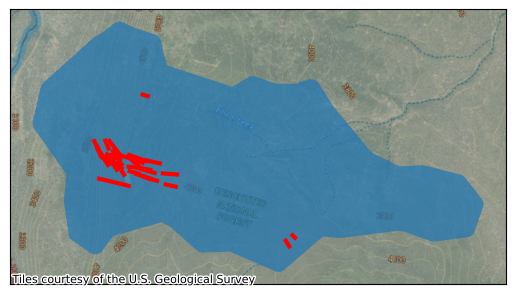

In [9]:
fig, ax = plt.subplots()
firePerims.iloc[-1:].plot(ax=ax,alpha=0.7)
fireDrops.plot(ax=ax,color='r',linewidth=3)
ax.set_xticks([])  # Turn off x-axis ticks and labels
ax.set_yticks([])  # Turn off y-axis ticks and labels
cx.add_basemap(ax, crs=firePerims.crs.to_string(), source=cx.providers.USGS.USImageryTopo)

In [10]:
fireDrops.sample()

,dropID,vendor,tail_number,inc_name,inc_num,viirs_fireid,mtbs_eventID,false_pos,split_drop,IA_drop,AC_type,fluid,nonfire,knots,heading_true,alt_feet,gallons,geometry,latitude,longitude,line_length_mile,shape_length,drop_minute,drop_second,UTC_date_time,local_date,local_year,local_month,local_day,local_tz,local_hour,burn_severity,gm_pdsi,gm_srad,gm_vpd,aw_mat,aw_mcmt,aw_mwmt,aw_td,dem,dem_slope,dem_aspect,dem_flow_acc,landfire_fvt,landfire_fbfm40,biomass_afg,biomass_pfg,ndvi,dm_tmax,dm_tmin,hillshade,prev_area,gallon_sum,prev_perimID,fut_perimID,ros_before,ros_after,ros_change,efficacy_mean,real_drop
365,N293EA_2020_233_02:08:45,TracPlus,T-103,GREEN RIDGE 0684 CS,2020-ORDEF-000684,F11467,OR4446712160520200817,NO,NO,,LAT,Gel,,172.057248,87.0,4708.0,2785.0,"MULTILINESTRING ((-2007078.964 2656950.908, -2...",44.45517,-121.59216,0.190608,306.754541,08,45,2020-08-20 02:08:45,44062.0,2020.0,8.0,19.0,America/Los_Angeles,19.0,3.642857,-1.134286,260.55719,1.194286,7.214284,-0.3,17.107145,17.407141,1311.285767,6.359254,137.332886,25.642857,2025.5,155.785721,2.0,428.428558,0.5092,16.556776,5.679032,193.214286,1.021296e+07,39310.0,F11467_5,F11467_6,1.136364,14.375,13.238636,persistant,True


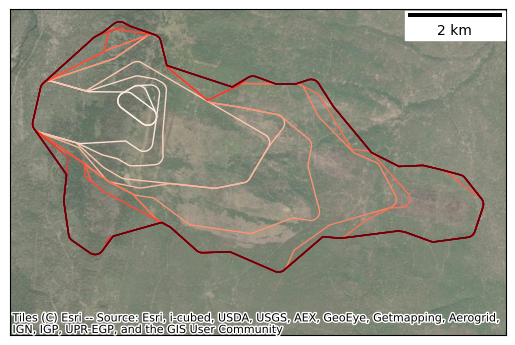

In [11]:
# Get bounds
minx, miny, maxx, maxy = firePerims.total_bounds

# Add a buffer   
x_range = maxx - minx
y_range = maxy - miny
minx -= x_range * 0.05
maxx += x_range * 0.05
miny -= y_range * 0.25
maxy += y_range * 0.05

ax = firePerims.plot(facecolor='none',column='duration',
                     cmap='Reds').axes

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_xticks([])
ax.set_yticks([])

scalebar = ScaleBar(1, location='upper right')
ax.add_artist(scalebar)
cx.add_basemap(ax, alpha=0.7,crs=firePerims.crs.to_string(), source=cx.providers.Esri.WorldImagery)

plt.savefig('images/green_ridge_perimeters.png', bbox_inches='tight', dpi=300)

In [12]:
j = 7
perimID = fireID + '_' + str(j)
perimPts = firePts[firePts.perimID == perimID] 
fireBox = firePerims.iloc[j+2]['geometry'].buffer(1000).bounds
prev = firePerims.iloc[j-1:j]

minx, miny, maxx, maxy = perimPts.total_bounds
x_range = maxx - minx
y_range = maxy - miny

minx -= x_range * 0.1
maxx += x_range * 0.1
miny -= y_range * 0.2
maxy += y_range * 0.2


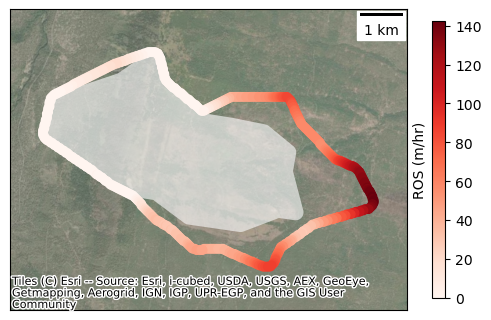

In [13]:
cmap = 'Reds'
ax = prev.plot(alpha=0.65,color='whitesmoke').axes
perimPts.plot(column='currROS',ax=ax,cmap=cmap)

norm = plt.Normalize(vmin=perimPts['currROS'].min(), vmax=perimPts['currROS'].max())
cmap = plt.get_cmap(cmap)
sm = cm.ScalarMappable(norm=norm,cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm,ax=ax, shrink=0.75)#,location='left')
cbar.set_label("ROS (m/hr)")
cbar.ax.yaxis.set_label_position('left')

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_xlabel('') 
ax.set_ylabel('') 

scalebar = ScaleBar(1, location='upper right')
ax.add_artist(scalebar)
ax.yaxis.set_label_position('left') 
cx.add_basemap(ax, alpha=0.7,crs=firePerims.crs.to_string(), source=cx.providers.Esri.WorldImagery)

plt.savefig('images/green_ridge_perim_ros.png', bbox_inches='tight', dpi=300)

In [14]:
fireID = perims.fireID.sample().iloc[0]
fireID = 'F9056'

firePerims = perims[perims.fireID == fireID]
fireDrops = drops[drops.viirs_fireid == fireID]
firePts = rosPts[rosPts.fireID == fireID]
fireID

'F9056'

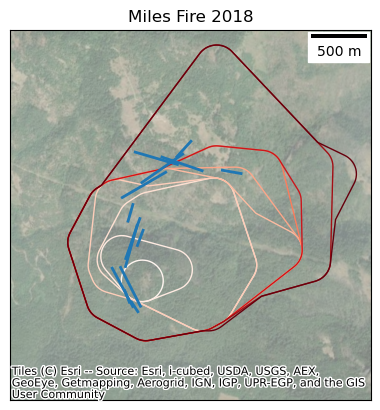

In [15]:
# Get bounds
minx, miny, maxx, maxy = firePerims.total_bounds

# Add a buffer 
x_range = maxx - minx
y_range = maxy - miny
minx -= x_range * 0.2
maxx += x_range * 0.05
miny -= y_range * 0.2
maxy += y_range * 0.05

ax = firePerims.plot(facecolor='none',column='duration',
                     cmap='Reds').axes
fireDrops.plot(ax=ax,linewidth=2)

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Miles Fire 2018')

scalebar = ScaleBar(1, location='upper right')
ax.add_artist(scalebar)
cx.add_basemap(ax, alpha=0.5,crs=firePerims.crs.to_string(), source=cx.providers.Esri.WorldImagery)

plt.savefig('images/miles_perimeters_all.png', bbox_inches='tight', dpi=300)